# Part 1: Volumetric Understanding of the Data

This notebook will serve to format gain an understanding of the tweet data (cleaned in the `data_cleaning.ipynb` notebook) in general and from a volumetric perspective.

### General setup

In [1]:
# Import packages
import pandas as pd 
import re
import matplotlib.pyplot as plt

In [31]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Prepare data

In [3]:
# Read in data 
data = pd.read_csv('./cleaned_tweet_data.csv')

# View first few rows of data
data.head(2)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the ...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...


### Exploring the Data

1. Get count of tweets overall

In [4]:
print("There are {} Tweets in our dataset".format(len(data)))

There are 51336 Tweets in our dataset


2. Understand distribution of data by topic (Abrams, Kemp, Election)

In [70]:
# Group by search term topic (combo of kemp, abrams, or election)
topic_counts = pd.DataFrame(data.groupby(['topic'])['topic'].count())
topic_counts.columns = ['counts']
topic_counts.reset_index(inplace=True)

# Get proportions of data represented by each search topic 
topic_counts['percent'] = round(topic_counts['counts'] / sum(topic_counts['counts']) * 100,1)

# View results
topic_counts

,topic,counts,percent
0,abrams,32299,62.9
1,"abrams, election",576,1.1
2,"abrams, kemp",2228,4.3
3,"abrams, kemp, election",780,1.5
4,election,3726,7.3
5,kemp,10518,20.5
6,"kemp, election",1209,2.4


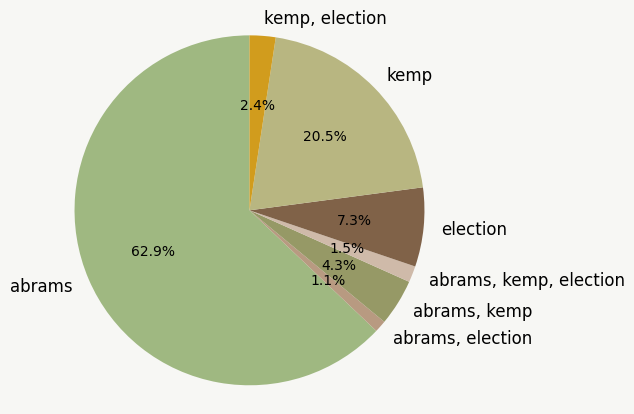

In [71]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.pie(topic_counts['percent'], 
       labels=topic_counts['topic'],
       autopct='%1.1f%%',
       shadow=False, 
       startangle=90,
       colors=[color1, color2, color8, color4, color5, color6, color7])
ax.axis('equal')
plt.savefig('../Visualizations/vol_topic_dist_pie')
plt.show()

In [72]:
### Get the counts of all tweets of each specific category (Abrams, Kemp, Election)

# Explode topics into a single row for each
topic_counts['topic'] = topic_counts['topic'].apply(lambda x: x.replace(',', ''))
topic_counts['topic'] = topic_counts['topic'].apply(lambda x: x.split())
topic_counts = topic_counts.explode('topic')
topic_counts = topic_counts[['topic', 'counts']]

# Group by search term topic (kemp, abrams, or election)
topic_counts = topic_counts.groupby(['topic']).sum(['counts'])
topic_counts.reset_index(inplace=True)

# View results
topic_counts

,topic,counts
0,abrams,35883
1,election,6291
2,kemp,14735


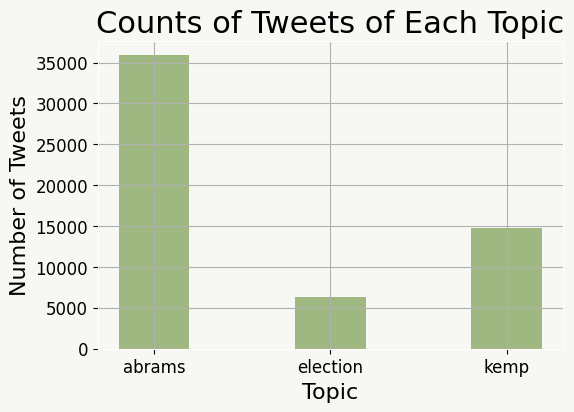

In [69]:
# Plot the counts of tweets of each topic
fig = plt.figure(figsize = (6, 4))
plt.bar(topic_counts['topic'], topic_counts['counts'], color=color1, width = 0.4)
plt.title('Number of Tweets of Each Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.savefig('../Visualizations/vol_topic_dist_bar')
plt.show()

basic EDA

- distribution of data 
- amount of tweets 

keyword associations to determine tweet mentions 

- keywords associated with each candidate 
- bin tweet into "mentions" category such that each tweet mentions 
    - candidate 1
    - candidate 2 
    - both candidates 
    - the election in general 

time series analysis 

- mentions of each candidate over time
(rate of increase or decrease of mentions over time) 

- overall which candidate is being talked about the most 

In [73]:
data

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the ...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...
2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,897218253826555905,JTaylorSkinner,Jenn Taylor-Skinner (she/her),Seattle,17762,25727,82402,False,43808,abrams,why did joe rogan send his little brother shan...,joe rogan send little brother shane interrupt ...,joe rogan send little brother shane interrupt ...
3,2022-10-18 00:00:08,Viral handbag designer and EBONY Power100 Styl...,"['StaceyAbrams', 'BrandonBlackwood', 'EBONYMag']",[],[],1,8,39008044,EBONYMag,EBONY MAGAZINE,NaN,2334,445954,4403,True,91289,abrams,viral handbag designer and ebony power style c...,viral handbag designer ebony power style curat...,viral handbag designer ebony power style curat...
4,2022-10-18 00:00:11,THE MOST DANGEROUS THING FACING GEORGIA IS 4 M...,[],[],[],212,528,1169707149167140867,MentallyDivine,Brian Baez,"Atlanta, GA",1990,9076,42697,False,9657,kemp,the most dangerous thing facing georgia is mor...,dangerous thing facing georgia years brian kem...,dangerous thing facing years wow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,2022-11-08 23:59:46,Stacey Abrams said abortion/ economy ho hand i...,[],[3223426134],['SethAbramson'],0,3,2353753341,DHolubiak,D Daggett Holubiak,"New Jersey, USA",609,397,72503,False,66171,abrams,stacey abrams said abortion economy ho han...,stacey abrams said abortion economy ho hand hand,said abortion economy ho hand hand
51332,2022-11-08 23:59:54,"Republican, Gov Brian Kemp is only 59, but loo...",[],"[3150198231, 1001285146392383489]","['easterdayadel', 'blaireerskine']",3,24,34086707,huffandpuff,pauline davis,NaN,737,938,99238,False,103479,kemp,republican gov brian kemp is only but looks ...,republican gov brian kemp looks like year old ...,republican looks like year old worn geezer lie...
51333,2022-11-08 23:59:57,Is Stacey Abrams my governor yet??,[],[],[],2,64,192596833,kss_phd,beyoncé of neuro 👑🧠🐝,"Atlanta, GA",993,9431,78858,False,15980,abrams,is stacey abrams my governor yet,stacey abrams governor yet,yet
51334,2022-11-08 23:59:57,I see your Katie Hobbs and raise you one Brian...,[],[2353605901],['GOPChairwoman'],0,6,1052011955534352384,KodiforTexas,KODI for TEXAS,NaN,2030,279,2026,True,1076,kemp,i see your katie hobbs and raise you one brian...,see katie hobbs raise one brian kemp,see katie hobbs raise one


/var/folders/tj/b8x6sk5104794yn7q0kw1wbm0000gn/T/ipykernel_70108/3140012061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_ts_df['day'] = pd.to_datetime(election_ts_df['created_at']).dt.floor('d')


<AxesSubplot:xlabel='day'>

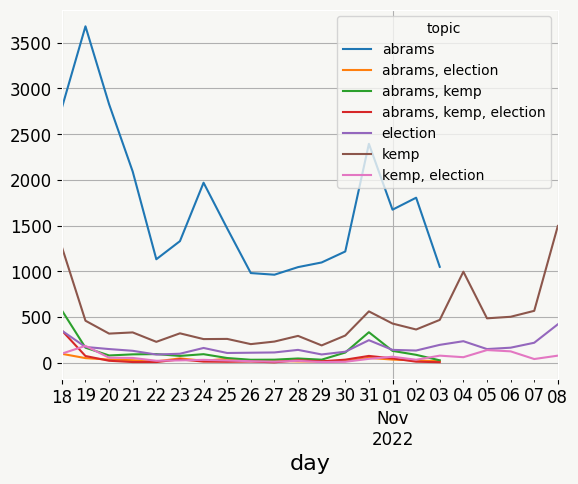

In [77]:
election_ts_df = data[['created_at', 'topic']]

election_ts_df['day'] = pd.to_datetime(election_ts_df['created_at']).dt.floor('d')
grouped_df = election_ts_df.groupby(['day', 'topic'], as_index=False).size()
pd.DataFrame(grouped_df.pivot(index="day", columns="topic", values="size")).plot()

/var/folders/tj/b8x6sk5104794yn7q0kw1wbm0000gn/T/ipykernel_70108/234766113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_ts_df['topic_split'] = election_ts_df['topic'].str.split(',')


<AxesSubplot:xlabel='day'>

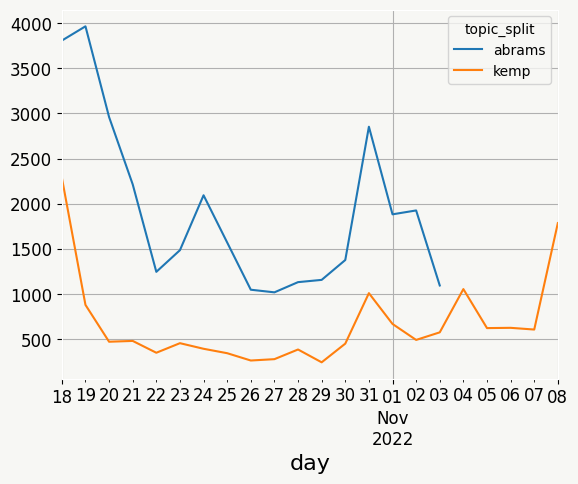

In [78]:
election_ts_df['topic_split'] = election_ts_df['topic'].str.split(',')
exploded_election_ts_df = election_ts_df.explode('topic_split')
exploded_election_ts_df['topic_split'] = exploded_election_ts_df['topic_split'].str.strip()
exploded_election_ts_df = exploded_election_ts_df[exploded_election_ts_df['topic_split'] != 'election']
exploded_grouped_df = exploded_election_ts_df.groupby(['day', 'topic_split'], as_index=False).size()
pd.DataFrame(exploded_grouped_df.pivot(index="day", columns="topic_split", values="size")).plot()

In [79]:
exploded_election_ts_df.groupby('topic_split').size()

topic_split
abrams    35883
kemp      14735
dtype: int64

<AxesSubplot:xlabel='day'>

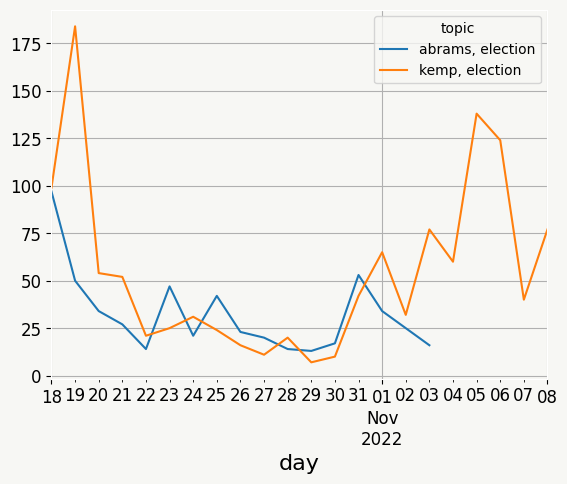

In [82]:
election_candidate_df = election_ts_df[election_ts_df['topic'].isin(['kemp, election', 'abrams, election'])]
election_candidate_df = election_candidate_df.groupby(['day', 'topic'], as_index=False).size()
pd.DataFrame(election_candidate_df.pivot(index="day", columns="topic", values="size")).plot()